In [2]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

import pandas as pd
import matplotlib.pyplot as plt

from _plotly_future_ import v4_subplots
import plotly.io as pio
import numpy as np
import chart_studio 
import chart_studio.plotly as cspy
import chart_studio.tools as tls


username = 'vishalgattani' # your username
api_key = 'WSy2EFPTbxYYm3Rmcx53' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

from datetime import datetime
from datetime import date, timedelta
from dateutil import parser

import plotly
import plotly.graph_objs as go
import pandas as pd
import plotly.figure_factory as ff
import plotly.express as px

In [36]:
#!/usr/bin/env python3

"""Show Stock-to-Flow values for Bitcoin."""

# Don't change tabbing, spacing, formating as file is automatically linted.
#
# Use this linter script:
#
# isort s2f.py
# flake8  --max-line-length 88 --max-doc-length 79 s2f.py
# python3 -m black s2f.py


import argparse
import datetime
import logging
import os
import re
import sys
import traceback

import requests


def infoFromBitcoinblockhalf(proxies):
    """Get Halving date from Bitcoinblockhalf."""
    url = "https://bitcoinblockhalf.com"
    cont = requests.get(url, proxies=proxies).content.decode()  # html
    logger.debug(f"cont {cont}")
    # HTML contains a line like this:
    # Reward-Drop ETA date: <strong>06 May 2024 19:26:00 UTC</strong>
    pattern = r"Reward-Drop ETA date: <strong>(.*?) ..:..:.. .*</strong>"
    m = re.search(pattern, cont)
    if m:
        next_halving_date = m.group(1)
    else:
        next_halving_date = "unknown"
    logger.debug(f"Estimate date of next halving: {next_halving_date}")
    return next_halving_date


def infoFromMessari(proxies):
    """Get data from Messari."""
    url = "https://data.messari.io/api/v1/assets/bitcoin/metrics"
    cont = requests.get(url, proxies=proxies).json()
    logger.debug(f"cont {cont}")
    fwd_stock_to_flow = cont["data"]["supply"]["stock_to_flow"]
    # conservative formula: 0.18 * s2f^3.3
    # aggressive formula:  exp(-1.84) * s2f^3.36
    # conservative gives slightly lower price
    # conservative formula: 0.18*s2f^3.3
    fwd_stock_to_flow_usd = 0.18 * fwd_stock_to_flow ** 3.3
    annual_inflation_percent = cont["data"]["supply"]["annual_inflation_percent"]
    circulating = cont["data"]["supply"]["circulating"]
    usd_price = cont["data"]["market_data"]["price_usd"]
    logger.debug(
        f"Data {fwd_stock_to_flow} {fwd_stock_to_flow_usd} "
        f"{annual_inflation_percent} {circulating}"
    )
    # example output: Data 54.73928728956236 98097.8891323435
    # 1.826841468925517 18410936.0981691
    return (
        float(usd_price),
        float(circulating),
        float(annual_inflation_percent),
        float(fwd_stock_to_flow),
        float(fwd_stock_to_flow_usd),
    )


def btcSupplyOnDate(date):
    """Provide BTC supply on a given date."""
    proxies = {}
    url = (
        "https://community-api.coinmetrics.io/"
        + "v2/assets/btc/metricdata?metrics=SplyCur&start="
        + str(date)
        + "&end="
        + str(date)
    )
    cont = requests.get(url,proxies=proxies).json()
    supply = cont["metricData"]["series"][0]["values"][0]
    return float(supply)

def infoFromCoinMetrics(period, proxies):
    proxies = {}
    """Compute Stock-to-Flow ratio and price."""
    dateYesterday = datetime.date.today() - datetime.timedelta(days=4)
    datePeriodInit = dateYesterday - datetime.timedelta(days=period)
    print(dateYesterday,datePeriodInit)
    supplyYesterday = btcSupplyOnDate(dateYesterday)
    supplyPeriodAgo = btcSupplyOnDate(datePeriodInit)
    print(supplyYesterday,supplyPeriodAgo)
    stock_to_flow_ratio = supplyPeriodAgo / (
        (supplyYesterday - supplyPeriodAgo) / period * 365
    )
    print(supplyYesterday - supplyPeriodAgo)
    # conservative formula: 0.18*s2f^3.3, see comments above
    stock_to_flow_usd = 0.18 * stock_to_flow_ratio ** 3.3
    return stock_to_flow_ratio, stock_to_flow_usd

#btcSupplyOnDate("2009-01-05")
#btcSupplyOnDate("2021-11-11")
infoFromCoinMetrics(463, {})

2021-11-11 2020-08-05
18870450.04234217 18452310.87871091
418139.1636312604


(55.97808576619046, 105616.56717774361)

In [113]:
idx = pd.date_range("2009-01-05", "2021-11-11") #date.today - 1
result = pd.DataFrame()
result = result.reindex(idx,fill_value=None)
result.reset_index(inplace=True)
result.columns=["date"]
str(result.date[0])
#btcSupplyOnDate(result.date[0])
result["x"] = result.date.apply(lambda x: x.strftime('%Y-%m-%d'))
df1 = result[result.x <= "2009-12-31"]
df2 = result[(result.x >= "2010-01-01") & (result.x <= "2010-12-31")]
df3 = result[(result.x >= "2011-01-01") & (result.x <= "2011-12-31")]
df4 = result[(result.x >= "2012-01-01") & (result.x <= "2012-12-31")]
df5 = result[(result.x >= "2013-01-01") & (result.x <= "2013-12-31")]
df6 = result[(result.x >= "2014-01-01") & (result.x <= "2014-12-31")]
df7 = result[(result.x >= "2015-01-01") & (result.x <= "2015-12-31")]
df8 = result[(result.x >= "2016-01-01") & (result.x <= "2016-12-31")]
df9 = result[(result.x >= "2017-01-01") & (result.x <= "2017-12-31")]
df10 = result[(result.x >= "2018-01-01") & (result.x <= "2018-12-31")]
df11 = result[(result.x >= "2019-01-01") & (result.x <= "2019-12-31")]
df12 = result[(result.x >= "2020-01-01") & (result.x <= "2020-12-31")]
df13 = result[(result.x >= "2021-01-01") & (result.x <= "2021-11-11")]

dflist = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13]
for i in dflist:
    i.reset_index(inplace=True)

In [120]:
l = []
for i in dflist:
    l1=[]
    print(i["x"][0])
    for j in range(len(i)):
        val = btcSupplyOnDate(i["x"][j])
        print(i["x"][j],val)
        l1.append(val)
    l.append(l1)

2009-01-05
2009-01-05 0.0
2009-01-06 0.0
2009-01-07 0.0
2009-01-08 0.0
2009-01-09 950.0
2009-01-10 4000.0
2009-01-11 8650.0
2009-01-12 13350.0
2009-01-13 19500.0
2009-01-14 25950.0
2009-01-15 32250.0
2009-01-16 37650.0
2009-01-17 43100.0
2009-01-18 48450.0
2009-01-19 54200.0
2009-01-20 59900.0
2009-01-21 65000.0
2009-01-22 69550.0
2009-01-23 73750.0
2009-01-24 83800.0
2009-01-25 93350.0
2009-01-26 98150.0
2009-01-27 103000.0
2009-01-28 108600.0
2009-01-29 114650.0
2009-01-30 120500.0
2009-01-31 127400.0
2009-02-01 133050.0
2009-02-02 139450.0
2009-02-03 146400.0
2009-02-04 152350.0
2009-02-05 158650.0
2009-02-06 164750.0
2009-02-07 171200.0
2009-02-08 177800.0
2009-02-09 184500.0
2009-02-10 190500.0
2009-02-11 197150.0
2009-02-12 203100.0
2009-02-13 209300.0
2009-02-14 216100.0
2009-02-15 222500.0
2009-02-16 228600.0
2009-02-17 234450.0
2009-02-18 240350.0
2009-02-19 246550.0
2009-02-20 252650.0
2009-02-21 258350.0
2009-02-22 264400.0
2009-02-23 269800.0
2009-02-24 275100.0
2009-02-25 

2010-02-10 1976650.0
2010-02-11 1985100.0
2010-02-12 1994250.0
2010-02-13 2005850.0
2010-02-14 2016250.0
2010-02-15 2025050.0
2010-02-16 2034800.0
2010-02-17 2046750.0
2010-02-18 2057150.0
2010-02-19 2066750.0
2010-02-20 2077150.0
2010-02-21 2088300.0
2010-02-22 2101300.0
2010-02-23 2113800.0
2010-02-24 2122350.0
2010-02-25 2130050.0
2010-02-26 2138650.0
2010-02-27 2147250.0
2010-02-28 2155050.0
2010-03-01 2164800.0
2010-03-02 2174200.0
2010-03-03 2181800.0
2010-03-04 2191050.0
2010-03-05 2199600.0
2010-03-06 2208450.0
2010-03-07 2217400.0
2010-03-08 2223650.0
2010-03-09 2230950.0
2010-03-10 2239050.0
2010-03-11 2245700.0
2010-03-12 2251750.0
2010-03-13 2259400.0
2010-03-14 2265650.0
2010-03-15 2272400.0
2010-03-16 2278700.0
2010-03-17 2285500.0
2010-03-18 2292500.0
2010-03-19 2300150.0
2010-03-20 2309750.0
2010-03-21 2318900.0
2010-03-22 2327850.0
2010-03-23 2338200.0
2010-03-24 2346750.0
2010-03-25 2356100.0
2010-03-26 2365950.0
2010-03-27 2374850.0
2010-03-28 2384150.0
2010-03-29 23

2011-03-07 5630300.0
2011-03-08 5639650.0
2011-03-09 5647650.0
2011-03-10 5653150.0
2011-03-11 5659650.0
2011-03-12 5666650.0
2011-03-13 5672500.0
2011-03-14 5678100.0
2011-03-15 5683700.0
2011-03-16 5690500.0
2011-03-17 5697550.0
2011-03-18 5703550.0
2011-03-19 5709300.0
2011-03-20 5716150.0
2011-03-21 5723550.0
2011-03-22 5729500.0
2011-03-23 5737350.0
2011-03-24 5744950.0
2011-03-25 5753600.0
2011-03-26 5760500.0
2011-03-27 5767650.0
2011-03-28 5776050.0
2011-03-29 5784200.0
2011-03-30 5792000.0
2011-03-31 5802050.0
2011-04-01 5810850.0
2011-04-02 5819850.0
2011-04-03 5828600.0
2011-04-04 5837500.0
2011-04-05 5847200.0
2011-04-06 5854600.0
2011-04-07 5861950.0
2011-04-08 5870250.0
2011-04-09 5878050.0
2011-04-10 5886700.0
2011-04-11 5894850.0
2011-04-12 5903000.0
2011-04-13 5912700.0
2011-04-14 5920700.0
2011-04-15 5927500.0
2011-04-16 5936150.0
2011-04-17 5945150.0
2011-04-18 5952550.0
2011-04-19 5960250.0
2011-04-20 5967450.0
2011-04-21 5974800.0
2011-04-22 5983600.0
2011-04-23 59

2012-01-11 8088699.98999999
2012-01-12 8096449.98999999
2012-01-13 8103449.98999999
2012-01-14 8110949.98999999
2012-01-15 8117899.98999999
2012-01-16 8126649.98999999
2012-01-17 8134499.98999999
2012-01-18 8140899.97299999
2012-01-19 8148399.87710466
2012-01-20 8155649.47198481
2012-01-21 8163849.04744397
2012-01-22 8170648.84204106
2012-01-23 8179148.67363629
2012-01-24 8186097.56325165
2012-01-25 8193497.34414703
2012-01-26 8200396.51861203
2012-01-27 8207445.1514304
2012-01-28 8214692.90088381
2012-01-29 8223041.75104146
2012-01-30 8231641.41143302
2012-01-31 8239141.34443302
2012-02-01 8246191.10632214
2012-02-02 8254140.94315441
2012-02-03 8262040.7846608
2012-02-04 8269890.75849937
2012-02-05 8276990.75849937
2012-02-06 8284290.75849937
2012-02-07 8291140.75599937
2012-02-08 8298390.75599937
2012-02-09 8305640.75599937
2012-02-10 8312540.72339413
2012-02-11 8320040.61839413
2012-02-12 8327940.58989413
2012-02-13 8334790.57589413
2012-02-14 8341690.57589413
2012-02-15 8348390.568

2012-10-29 10281689.96151183
2012-10-30 10288839.96101183
2012-10-31 10296039.95951183
2012-11-01 10302889.95801183
2012-11-02 10310039.95651183
2012-11-03 10317339.95601183
2012-11-04 10325189.95551183
2012-11-05 10333189.95451183
2012-11-06 10339939.95351183
2012-11-07 10347789.95351183
2012-11-08 10355489.95351183
2012-11-09 10363089.95301183
2012-11-10 10370289.95201183
2012-11-11 10377639.95151183
2012-11-12 10384239.95151183
2012-11-13 10391239.94951183
2012-11-14 10398389.94851183
2012-11-15 10405189.94801183
2012-11-16 10412439.94801183
2012-11-17 10419439.94701183
2012-11-18 10426739.94701183
2012-11-19 10434039.94601183
2012-11-20 10441389.94451183
2012-11-21 10448989.94451183
2012-11-22 10456189.94401183
2012-11-23 10464339.94401183
2012-11-24 10471889.94351183
2012-11-25 10479189.94351183
2012-11-26 10487039.94351183
2012-11-27 10494439.94351183
2012-11-28 10501439.94351183
2012-11-29 10505589.94301183
2012-11-30 10508714.94251183
2012-12-01 10512889.94201183
2012-12-02 105

2013-08-08 11525289.79731183
2013-08-09 11530164.79731183
2013-08-10 11535414.79731183
2013-08-11 11540814.79681183
2013-08-12 11546214.79581183
2013-08-13 11550789.79581183
2013-08-14 11554989.79581183
2013-08-15 11559239.79581183
2013-08-16 11563439.79581183
2013-08-17 11568189.79581183
2013-08-18 11573039.79581183
2013-08-19 11577464.79581183
2013-08-20 11582214.79581183
2013-08-21 11587114.79581183
2013-08-22 11592514.79581183
2013-08-23 11597414.79581183
2013-08-24 11601989.79581183
2013-08-25 11605764.79581183
2013-08-26 11609914.79581183
2013-08-27 11614139.79581183
2013-08-28 11618589.79581183
2013-08-29 11623314.79581183
2013-08-30 11628439.79581183
2013-08-31 11634014.79581183
2013-09-01 11639539.79581183
2013-09-02 11644914.79581183
2013-09-03 11649764.79581183
2013-09-04 11653839.79581183
2013-09-05 11658314.79581183
2013-09-06 11662939.79581183
2013-09-07 11666564.79581183
2013-09-08 11670489.79581183
2013-09-09 11675564.79581183
2013-09-10 11680339.79581183
2013-09-11 116

2014-05-18 12786514.79190227
2014-05-19 12790714.79102867
2014-05-20 12795139.79102867
2014-05-21 12799514.79102867
2014-05-22 12803814.79102867
2014-05-23 12807939.79102854
2014-05-24 12811789.79102854
2014-05-25 12815814.79102854
2014-05-26 12819764.79102854
2014-05-27 12823164.79102854
2014-05-28 12827389.79102854
2014-05-29 12830914.79102854
2014-05-30 12835089.79102854
2014-05-31 12838764.79102854
2014-06-01 12843139.79102854
2014-06-02 12847964.79102854
2014-06-03 12852414.79102854
2014-06-04 12856939.79102854
2014-06-05 12860739.79102854
2014-06-06 12864214.79102854
2014-06-07 12868089.79102854
2014-06-08 12871489.79102854
2014-06-09 12875389.79102854
2014-06-10 12879564.79102854
2014-06-11 12883214.79102854
2014-06-12 12887514.79102854
2014-06-13 12891589.79102854
2014-06-14 12896039.79002854
2014-06-15 12900789.79002854
2014-06-16 12905489.79002854
2014-06-17 12910089.79002854
2014-06-18 12914039.79002854
2014-06-19 12918214.79002854
2014-06-20 12922864.79002854
2014-06-21 129

2015-02-25 13879139.77349039
2015-02-26 13882889.77349039
2015-02-27 13886689.77349039
2015-02-28 13890239.77349039
2015-03-01 13893739.77168859
2015-03-02 13897689.77168859
2015-03-03 13901639.77168859
2015-03-04 13905139.77168859
2015-03-05 13908439.77168859
2015-03-06 13912139.77168859
2015-03-07 13915639.77168859
2015-03-08 13919539.77168859
2015-03-09 13923139.77152479
2015-03-10 13926939.77152479
2015-03-11 13930789.77152479
2015-03-12 13934064.77152479
2015-03-13 13937714.77152479
2015-03-14 13940989.77152479
2015-03-15 13944564.77136099
2015-03-16 13948039.77136099
2015-03-17 13951239.77136098
2015-03-18 13955064.77136098
2015-03-19 13958489.77136098
2015-03-20 13961889.77136098
2015-03-21 13965664.77136098
2015-03-22 13969214.77136098
2015-03-23 13972839.77136098
2015-03-24 13977164.77136098
2015-03-25 13981214.77136098
2015-03-26 13984914.77136098
2015-03-27 13989189.77136098
2015-03-28 13992889.77136098
2015-03-29 13996714.77136098
2015-03-30 14000264.77136098
2015-03-31 140

2015-12-05 14922886.13479302
2015-12-06 14926861.13458208
2015-12-07 14930536.13452083
2015-12-08 14934911.13404066
2015-12-09 14939111.1340406
2015-12-10 14944511.13404054
2015-12-11 14948511.13394046
2015-12-12 14952561.13393043
2015-12-13 14956111.1339303
2015-12-14 14960986.1339301
2015-12-15 14965561.13385338
2015-12-16 14969636.13382056
2015-12-17 14973511.13382042
2015-12-18 14977736.13382039
2015-12-19 14981661.13382033
2015-12-20 14985786.13376031
2015-12-21 14989511.13376028
2015-12-22 14993261.13376013
2015-12-23 14997186.13375983
2015-12-24 15000636.13375977
2015-12-25 15004686.13375975
2015-12-26 15008961.13375974
2015-12-27 15014086.13375937
2015-12-28 15017861.13375936
2015-12-29 15021836.13375907
2015-12-30 15025961.13375896
2015-12-31 15029511.13374743
2016-01-01
2016-01-01 15032886.13374194
2016-01-02 15036511.1337419
2016-01-03 15040136.13374189
2016-01-04 15044661.13374178
2016-01-05 15048586.13374084
2016-01-06 15052111.13373527
2016-01-07 15055786.13373498
2016-01

2016-09-14 15873048.60428549
2016-09-15 15874973.60428497
2016-09-16 15876711.10428491
2016-09-17 15878748.60413484
2016-09-18 15880561.10413482
2016-09-19 15882223.60403371
2016-09-20 15884111.10403367
2016-09-21 15886186.10403355
2016-09-22 15887948.60403349
2016-09-23 15889648.60402794
2016-09-24 15891723.60402793
2016-09-25 15894036.10402793
2016-09-26 15895948.6040279
2016-09-27 15898036.10402783
2016-09-28 15899886.10392779
2016-09-29 15901673.60392776
2016-09-30 15903448.60392773
2016-10-01 15905411.10392773
2016-10-02 15907173.60392773
2016-10-03 15909061.10392764
2016-10-04 15911036.10392757
2016-10-05 15913123.6039275
2016-10-06 15915136.10392743
2016-10-07 15916923.60392732
2016-10-08 15919036.1039273
2016-10-09 15921036.10392728
2016-10-10 15922586.10392695
2016-10-11 15924323.60392684
2016-10-12 15926123.60391672
2016-10-13 15927723.60391644
2016-10-14 15929423.60391639
2016-10-15 15931198.60391639
2016-10-16 15932823.60391639
2016-10-17 15934386.10391538
2016-10-18 159363

2017-06-24 16409486.09373217
2017-06-25 16411011.09373217
2017-06-26 16412786.09373207
2017-06-27 16414423.59373195
2017-06-28 16416386.09373182
2017-06-29 16417886.09372168
2017-06-30 16419811.09372154
2017-07-01 16421861.09362143
2017-07-02 16424211.09362141
2017-07-03 16426336.09362129
2017-07-04 16428248.59362107
2017-07-05 16430111.09361094
2017-07-06 16431886.09361081
2017-07-07 16433736.09361069
2017-07-08 16435798.59361057
2017-07-09 16437523.59361045
2017-07-10 16439986.09361043
2017-07-11 16442148.5936104
2017-07-12 16444361.09361037
2017-07-13 16446323.59361033
2017-07-14 16448061.09361031
2017-07-15 16449648.5936103
2017-07-16 16451686.09361029
2017-07-17 16453536.09361026
2017-07-18 16455598.59361023
2017-07-19 16457461.09361021
2017-07-20 16459486.09361018
2017-07-21 16461411.09361016
2017-07-22 16463411.09361014
2017-07-23 16465561.09361012
2017-07-24 16467786.0936101
2017-07-25 16469636.09360999
2017-07-26 16471473.59360997
2017-07-27 16473398.59360995
2017-07-28 164752

2018-04-04 16958236.08586475
2018-04-05 16960186.08586455
2018-04-06 16961911.08586455
2018-04-07 16964161.08586455
2018-04-08 16966173.58586455
2018-04-09 16968011.08584445
2018-04-10 16970061.08584425
2018-04-11 16972073.58584425
2018-04-12 16973998.58584425
2018-04-13 16976061.08584425
2018-04-14 16977773.58584425
2018-04-15 16979811.08584425
2018-04-16 16981573.58584425
2018-04-17 16983598.58584425
2018-04-18 16985598.58584425
2018-04-19 16987823.58584425
2018-04-20 16989536.08584415
2018-04-21 16991523.58584415
2018-04-22 16993523.58583415
2018-04-23 16995436.08582415
2018-04-24 16997423.58582415
2018-04-25 16998961.08582415
2018-04-26 17000723.58582405
2018-04-27 17002498.58582395
2018-04-28 17004098.58582395
2018-04-29 17006073.58582395
2018-04-30 17008011.08582395
2018-05-01 17009986.08581849
2018-05-02 17011736.08581839
2018-05-03 17013623.58581839
2018-05-04 17015348.58581839
2018-05-05 17017361.08579839
2018-05-06 17019073.58579839
2018-05-07 17020948.58579819
2018-05-08 170

2019-01-13 17480129.82715233
2019-01-14 17481992.32712503
2019-01-15 17483642.32709773
2019-01-16 17485304.82707043
2019-01-17 17486892.32704313
2019-01-18 17488617.32701583
2019-01-19 17490279.82701583
2019-01-20 17492242.32701583
2019-01-21 17494117.32701583
2019-01-22 17495742.32701583
2019-01-23 17497567.32701583
2019-01-24 17499592.32701504
2019-01-25 17501317.32701504
2019-01-26 17503192.32701504
2019-01-27 17504904.82701504
2019-01-28 17506717.32701504
2019-01-29 17508542.32699504
2019-01-30 17510242.32699504
2019-01-31 17512179.82699504
2019-02-01 17514154.82699504
2019-02-02 17515954.82699504
2019-02-03 17517679.82699504
2019-02-04 17519517.32699504
2019-02-05 17521354.82699504
2019-02-06 17523404.82699504
2019-02-07 17525579.82699504
2019-02-08 17527617.32698958
2019-02-09 17529492.32698958
2019-02-10 17531242.32698958
2019-02-11 17533054.82698958
2019-02-12 17534654.82698412
2019-02-13 17536567.32697866
2019-02-14 17538329.8269732
2019-02-15 17539917.32696774
2019-02-16 1754

2019-10-24 18011329.82185602
2019-10-25 18013054.82182326
2019-10-26 18014804.82182326
2019-10-27 18016242.32182326
2019-10-28 18017917.32180779
2019-10-29 18019579.82177503
2019-10-30 18021254.82176957
2019-10-31 18022904.82176411
2019-11-01 18024529.82176411
2019-11-02 18026204.82176411
2019-11-03 18027929.82176411
2019-11-04 18029579.82175865
2019-11-05 18031379.82171589
2019-11-06 18033029.82168313
2019-11-07 18034717.32167767
2019-11-08 18036317.32167221
2019-11-09 18038117.32167221
2019-11-10 18040192.32167221
2019-11-11 18042079.82166675
2019-11-12 18043767.32166129
2019-11-13 18045454.82165583
2019-11-14 18047567.32165037
2019-11-15 18049542.32164491
2019-11-16 18051392.32164491
2019-11-17 18053317.32164491
2019-11-18 18055067.32163945
2019-11-19 18056904.82163399
2019-11-20 18058679.82163399
2019-11-21 18060392.32162853
2019-11-22 18062042.32162307
2019-11-23 18064204.82162307
2019-11-24 18065842.32162307
2019-11-25 18067404.82162307
2019-11-26 18068929.82162307
2019-11-27 180

2020-08-02 18449585.87873375
2020-08-03 18450598.37871637
2020-08-04 18451504.62871091
2020-08-05 18452310.87871091
2020-08-06 18453285.87871091
2020-08-07 18454235.87870545
2020-08-08 18455123.37870545
2020-08-09 18456098.37870545
2020-08-10 18456954.62870545
2020-08-11 18457917.12870545
2020-08-12 18458898.37870545
2020-08-13 18459817.12870112
2020-08-14 18460860.87865277
2020-08-15 18461835.87865277
2020-08-16 18462785.87865277
2020-08-17 18463567.12865277
2020-08-18 18464442.12865277
2020-08-19 18465304.62862001
2020-08-20 18466217.12861455
2020-08-21 18467185.87857087
2020-08-22 18468035.87855438
2020-08-23 18469017.12855438
2020-08-24 18469948.37854892
2020-08-25 18470748.37854892
2020-08-26 18471635.87854892
2020-08-27 18472442.12854892
2020-08-28 18473460.87852162
2020-08-29 18474373.37852162
2020-08-30 18475167.12852162
2020-08-31 18476104.62852162
2020-09-01 18477067.12852162
2020-09-02 18477967.12852162
2020-09-03 18478773.37852162
2020-09-04 18479617.12852162
2020-09-05 184

2021-05-12 18708312.79793575
2021-05-13 18709319.04793575
2021-05-14 18710156.54793575
2021-05-15 18710925.29793575
2021-05-16 18711750.29793575
2021-05-17 18712506.54793575
2021-05-18 18713131.54793575
2021-05-19 18713912.79793575
2021-05-20 18714612.79793575
2021-05-21 18715300.29793575
2021-05-22 18716025.29793575
2021-05-23 18716769.04793575
2021-05-24 18717556.29293575
2021-05-25 18718325.04293575
2021-05-26 18719087.54293575
2021-05-27 18719818.79293575
2021-05-28 18720562.54293575
2021-05-29 18721287.54293575
2021-05-30 18722187.54293575
2021-05-31 18723068.79293575
2021-06-01 18723956.29293575
2021-06-02 18724993.79293575
2021-06-03 18725912.54293575
2021-06-04 18726731.29293575
2021-06-05 18727550.0429314
2021-06-06 18728487.5429314
2021-06-07 18729318.7929314
2021-06-08 18730250.0429314
2021-06-09 18731037.5429314
2021-06-10 18731775.0429314
2021-06-11 18732431.2929314
2021-06-12 18733256.2929314
2021-06-13 18734081.2929314
2021-06-14 18734925.0429314
2021-06-15 18735743.7929

In [129]:
mergedlist = []
for i in l:
    mergedlist.extend(i)

se = pd.Series(mergedlist)
result['btcSupplyOnDate'] = se.values
btcwithsupply = result[["date","btcSupplyOnDate"]]
btcwithsupply.to_csv("btcwithSupplyOnDates 2009-01-05-2021-11-11.csv")

In [8]:
btcwithsupply = pd.read_csv("btcwithSupplyOnDates 2009-01-05-2021-11-11.csv")
btcwithsupply.set_index("date",inplace=True)
btcwithsupply = btcwithsupply[["btcSupplyOnDate"]]
btcwithsupply

,btcSupplyOnDate
date,
2009-01-05,0.000000e+00
2009-01-06,0.000000e+00
2009-01-07,0.000000e+00
2009-01-08,0.000000e+00
2009-01-09,9.500000e+02
...,...
2021-11-07,1.886674e+07
2021-11-08,1.886758e+07
2021-11-09,1.886853e+07


In [9]:
btc = pd.read_csv("btc.csv")
btc['date'] = btc.apply(lambda x: parser.parse(x["date"]).date(), axis=1)
df = btc[["date","BlkCnt","PriceBTC","PriceUSD","HashRate","DiffLast"]]
df["date"] = pd.to_datetime(df["date"])
df[["BlkHeight"]] = df.BlkCnt.cumsum()
df[["Reward"]] = 50/(2**np.floor(df["BlkHeight"]/210000))
df[["BTCGenFrmBlk"]] = df.BlkCnt*df["Reward"]
df[["totalBTC"]] = df.BTCGenFrmBlk.cumsum()
#df = df.drop(df[df.totalBTC<=1000000].index)
df.set_index("date",inplace=True)
df

,BlkCnt,PriceBTC,PriceUSD,HashRate,DiffLast,BlkHeight,Reward,BTCGenFrmBlk,totalBTC
date,,,,,,,,,
2009-01-03,0.0,1.0,NaN,NaN,NaN,0.0,50.00,0.00,0.00
2009-01-04,0.0,1.0,NaN,NaN,NaN,0.0,50.00,0.00,0.00
2009-01-05,0.0,1.0,NaN,NaN,NaN,0.0,50.00,0.00,0.00
2009-01-06,0.0,1.0,NaN,NaN,NaN,0.0,50.00,0.00,0.00
2009-01-07,0.0,1.0,NaN,NaN,NaN,0.0,50.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2021-11-08,135.0,1.0,67541.755508,1.453534e+08,2.165934e+13,708845.0,6.25,843.75,18863037.50
2021-11-09,152.0,1.0,67095.585671,1.636572e+08,2.165934e+13,708997.0,6.25,950.00,18863987.50
2021-11-10,149.0,1.0,64756.077969,1.604271e+08,2.165934e+13,709146.0,6.25,931.25,18864918.75


In [140]:
df.index = pd.DatetimeIndex(df.index)
btcwithsupply.index = pd.DatetimeIndex(btcwithsupply.index)

data = pd.concat([df, btcwithsupply], axis=1)
#result = result.reset_index()
#result = result.ffill()
#result.describe()
idx = pd.date_range('01-05-2009', '11-11-2021')
#idx = pd.date_range('08-01-2010', '05-01-2032')

data = data.reindex(idx,fill_value=None)
data

,BlkCnt,PriceBTC,PriceUSD,HashRate,DiffLast,BlkHeight,Reward,BTCGenFrmBlk,totalBTC,btcSupplyOnDate
2009-01-05,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00,0.000000e+00
2009-01-06,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00,0.000000e+00
2009-01-07,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00,0.000000e+00
2009-01-08,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00,0.000000e+00
2009-01-09,19.0,1.0,0.000000,9.444951e-07,1.000000e+00,19.0,50.00,950.00,950.00,9.500000e+02
...,...,...,...,...,...,...,...,...,...,...
2021-11-07,153.0,1.0,63043.829059,1.647339e+08,2.165934e+13,708710.0,6.25,956.25,18862193.75,1.886674e+07
2021-11-08,135.0,1.0,67541.755508,1.453534e+08,2.165934e+13,708845.0,6.25,843.75,18863037.50,1.886758e+07
2021-11-09,152.0,1.0,67095.585671,1.636572e+08,2.165934e+13,708997.0,6.25,950.00,18863987.50,1.886853e+07
2021-11-10,149.0,1.0,64756.077969,1.604271e+08,2.165934e+13,709146.0,6.25,931.25,18864918.75,1.886946e+07


data["stock10_1"] = data["totalBTC"].rolling(10).sum()
data["stock10_2"] = data["btcSupplyOnDate"].rolling(10).sum()

data["stock463_1"] = data["totalBTC"].rolling(463).sum()
data["stock463_2"] = data["btcSupplyOnDate"].rolling(463).sum()

data

In [141]:
# dateYesterday = datetime.date.today() - datetime.timedelta(days=1)
# datePeriodInit = dateYesterday - datetime.timedelta(days=period)
# supplyYesterday = btcSupplyOnDate(dateYesterday, proxies)
# supplyPeriodAgo = btcSupplyOnDate(datePeriodInit, proxies)
# stock_to_flow_ratio = supplyPeriodAgo / ((supplyYesterday - supplyPeriodAgo) / period * 365)

# stock_to_flow_ratio_10_1 = supplyPeriodAgo / ((supplyYesterday - supplyPeriodAgo) / 10 * 365)
# stock_to_flow_ratio_10_2 = supplyPeriodAgo / ((supplyYesterday - supplyPeriodAgo) / 10 * 365)

# stock_to_flow_ratio_463_1 = supplyPeriodAgo / ((supplyYesterday - supplyPeriodAgo) / 463 * 365)
# stock_to_flow_ratio_463_2 = supplyPeriodAgo / ((supplyYesterday - supplyPeriodAgo) / 463 * 365)
data["flow10_1"] = data["totalBTC"].diff(10)
data["flow10_2"] = data["btcSupplyOnDate"].diff(10)

data["flow463_1"] = data["totalBTC"].diff(463)
data["flow463_2"] = data["btcSupplyOnDate"].diff(463)

data["supplyPeriodAgo10_2"] = data["btcSupplyOnDate"].shift(10)
data["supplyPeriodAgo463_2"] = data["btcSupplyOnDate"].shift(463)

data["stock_to_flow_ratio_10_2"] = (data["supplyPeriodAgo10_2"]) / ((data["flow10_2"]) / 10 * 365)
data["stock_to_flow_ratio_463_2"] = (data["supplyPeriodAgo463_2"]) / ((data["flow463_2"]) / 463 * 365)

data["stock_to_flow_usd_10"] = 0.18 * data["stock_to_flow_ratio_10_2"] ** 3.3
data["stock_to_flow_usd_463"] = 0.18 * data["stock_to_flow_ratio_463_2"] ** 3.3

#data["stock_to_flow_usd_10"] = 0.1588 * data["stock_to_flow_ratio_10_2"] ** 3.36
#data["stock_to_flow_usd_463"] = 0.1588 * data["stock_to_flow_ratio_463_2"] ** 3.36

data


,BlkCnt,PriceBTC,PriceUSD,HashRate,DiffLast,BlkHeight,Reward,BTCGenFrmBlk,totalBTC,btcSupplyOnDate,flow10_1,flow10_2,flow463_1,flow463_2,supplyPeriodAgo10_2,supplyPeriodAgo463_2,stock_to_flow_ratio_10_2,stock_to_flow_ratio_463_2,stock_to_flow_usd_10,stock_to_flow_usd_463
2009-01-05,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-06,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-07,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-09,19.0,1.0,0.000000,9.444951e-07,1.000000e+00,19.0,50.00,950.00,950.00,9.500000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-07,153.0,1.0,63043.829059,1.647339e+08,2.165934e+13,708710.0,6.25,956.25,18862193.75,1.886674e+07,9606.25,9606.249956,418056.25,418032.913630,1.885713e+07,1.844870e+07,53.781001,55.981371,92543.900696,105637.020815
2021-11-08,135.0,1.0,67541.755508,1.453534e+08,2.165934e+13,708845.0,6.25,843.75,18863037.50,1.886758e+07,9381.25,9381.249929,418018.75,417995.413624,1.885820e+07,1.844959e+07,55.074006,55.989067,100091.341028,105684.956235
2021-11-09,152.0,1.0,67095.585671,1.636572e+08,2.165934e+13,708997.0,6.25,950.00,18863987.50,1.886853e+07,9362.50,9362.499929,417956.25,417932.913641,1.885917e+07,1.845060e+07,55.187136,56.000513,100771.431695,105756.271117
2021-11-10,149.0,1.0,64756.077969,1.604271e+08,2.165934e+13,709146.0,6.25,931.25,18864918.75,1.886946e+07,9425.00,9424.999924,417981.25,417957.913641,1.886004e+07,1.845150e+07,54.823699,55.999914,98597.976993,105752.536935


# Charts

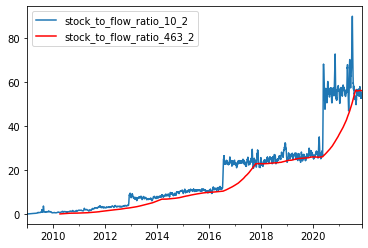

In [142]:
ax = plt.gca()
data.plot(kind='line',y='stock_to_flow_ratio_10_2',ax=ax)
data.plot(kind='line',y='stock_to_flow_ratio_463_2', color='red',ax=ax)
plt.show()

# Generate SF Table for future

In [143]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

def btcSupplyAtBlock(b):
    if b >= 33 * 210000:
        return 20999999.9769
    else:
        reward = 50e8
        supply = 0
        y = 210000
        while b > y - 1:
            supply = supply + y * reward
            reward = int(reward / 2.0)
            b = b - y
        supply = supply + b * reward
        #print(supply,reward)
        return (supply + reward) / 1e8
    
def btcRewardAtBlock(b):
    if b >= 33 * 210000:
        return 20999999.9769
    else:
        reward = 25e8
        supply = 0
        y = 210000
        while b > y - 1:
            supply = supply + y * reward
            reward = int(reward / 2.0)
            b = b - y
        supply = supply + b * reward
        
        return reward / 1e8
    



genesis = '2009-01-01'
hdates = ['2009-01-01','2012-11-28','2016-09-07','2020-05-11','2024-05-01','2028-05-01','2032-05-01']

sftable = pd.DataFrame(columns = ["date","StockBTC","RewardBTC","FlowBTC"])
sflist=[]
#sftable.columns = ["Date","StockBTC","RewardBTC","FlowBTC"]
for date in hdates:
    block = days_between(genesis, date) * 24 * 6
    d1 = datetime.strptime(date, '%Y-%m-%d')
    l = [d1,btcSupplyAtBlock(block),btcRewardAtBlock(block),365*24*60*0.1*btcRewardAtBlock(block)]
    sflist.append(l)
    #print(date + " - " + str(btcSupplyAtBlock(block))+ " - " + str(btcRewardAtBlock(block)))
sftable = pd.DataFrame(sflist,columns = ["date","StockBTC","RewardBTC","FlowBTC"])
#sftable['date'] = pd.to_datetime(sftable['date'], format='%y-%m-%d')

#print(sftable.dtypes)
sftable.set_index("date",inplace=True)
sftable["s2f"] = sftable.StockBTC/sftable.FlowBTC
sftable

,StockBTC,RewardBTC,FlowBTC,s2f
date,,,,
2009-01-01,5.000000e+01,25.00000,1314000.0,0.000038
2012-11-28,1.027445e+07,25.00000,1314000.0,7.819216
2016-09-07,1.535162e+07,12.50000,657000.0,23.366248
2020-05-11,1.796641e+07,6.25000,328500.0,54.692275
2024-05-01,1.947661e+07,3.12500,164250.0,118.579033
2028-05-01,2.023950e+07,1.56250,82125.0,246.447527
2032-05-01,2.062035e+07,0.78125,41062.5,502.169901


# Future BTC Price using S2F Plan B

4697


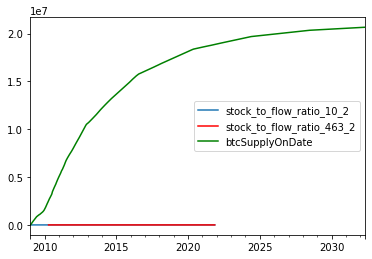

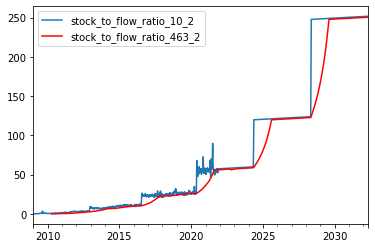

In [236]:
idx = pd.date_range('01-01-2009', '05-01-2032')
#idx = pd.date_range('08-01-2010', '05-01-2032')
result = data.copy(deep=True)
result.index = pd.DatetimeIndex(result.index)

result = result.reindex(idx,fill_value=None)
result.loc['2024-05-02']['Reward'] = 3.125
result.loc['2028-05-02']['Reward'] = 1.5625
result.Reward = result.Reward.ffill()
result.BlkCnt = result.BlkCnt.fillna(144)   
result.BTCGenFrmBlk = result.BlkCnt * result.Reward

result['btcSupplyOnDate'] = result['btcSupplyOnDate'].bfill()

#print(result.loc[result['btcSupplyOnDate'].isnull()])
print(result['btcSupplyOnDate'].index.get_loc(result['btcSupplyOnDate'].last_valid_index()))
#print(result.iloc[4697])
for i in range (4698,len(result)):
    result.iloc[i]['btcSupplyOnDate'] = float(0)
    result.iloc[i]['btcSupplyOnDate'] = result.iloc[i-1]['btcSupplyOnDate'] + result.iloc[i]["BTCGenFrmBlk"]
# while result['btcSupplyOnDate'].isnull().any():

    #print(result['btcSupplyOnDate'].shift())
    #result.loc[result['btcSupplyOnDate'].isnull(),'btcSupplyOnDate'] = result['btcSupplyOnDate'].shift() + result.BTCGenFrmBlk
    
# print(c)
#print(result.dtypes)
#result[result.loc['2024-05-01'],'stock_to_flow_ratio_10_2'] = 118.579033
# result.loc['2024-05-01']['stock_to_flow_ratio_10_2'] = 56.6
# result.loc['2024-05-02']['stock_to_flow_ratio_10_2'] = 118.579033
# result.loc['2028-05-01']['stock_to_flow_ratio_10_2'] = 246.447527
# result.loc['2028-05-02']['stock_to_flow_ratio_10_2'] = 246.447527
#result.loc['2032-05-02']['stock_to_flow_ratio_10_2'] = 502.169901
# result["stock_to_flow_ratio_10_2"] = result["stock_to_flow_ratio_10_2"].interpolate(method='index')
ax = plt.gca()
result.plot(kind='line',y='stock_to_flow_ratio_10_2',ax=ax)
result.plot(kind='line',y='stock_to_flow_ratio_463_2', color='red',ax=ax)
result.plot(kind='line',y='btcSupplyOnDate', color='green',ax=ax)

plt.show()


result["flow10_2"] = result["btcSupplyOnDate"].diff(10)

result["flow463_2"] = result["btcSupplyOnDate"].diff(463)

result["supplyPeriodAgo10_2"] = result["btcSupplyOnDate"].shift(10)
result["supplyPeriodAgo463_2"] = result["btcSupplyOnDate"].shift(463)

result["stock_to_flow_ratio_10_2"] = (result["supplyPeriodAgo10_2"]) / ((result["flow10_2"]) / 10 * 365)
result["stock_to_flow_ratio_463_2"] = (result["supplyPeriodAgo463_2"]) / ((result["flow463_2"]) / 463 * 365)

result["stock_to_flow_usd_10"] = 0.18 * result["stock_to_flow_ratio_10_2"] ** 3.3
result["stock_to_flow_usd_463"] = 0.18 * result["stock_to_flow_ratio_463_2"] ** 3.3


ax = plt.gca()
result.plot(kind='line',y='stock_to_flow_ratio_10_2',ax=ax)
result.plot(kind='line',y='stock_to_flow_ratio_463_2', color='red',ax=ax)
plt.show()

# Mining Equations

efficiency = watt / terahash; efficiency = 3360 W / 68 TH = 49.

To find the price paid per month to run a S-19 95 TH/s, at 3.25 kW, we need to first compute the monthly kWh as follows:
3.25 kW * hours per day * days per month = 3.25 * 24 * 30 = 2340 kWh/month

the estimated monthly electricity bill is:
2340 kWh * $0.06/kWh = $140.40 in electricity costs for the month.

3.25 * 0.05 = 0.1625 kW margins
lower kW bracket = 3.25 - 0.1625 = 3.0875 kW
upper kW bracket = 3.25 + 0.1625 = 3.4125 kW 

Line loss 5%:
$140.40 * 0.05 = $7.02
$140.40 +$7.02 = $147.42 due for the month, readjusted for line loss

Down time:
2340 kWh/month - 10 hours down time = 2330 kWh consumed
2330 kWh * $0.06/kWh = $139.80 due for the month, readjusted for down time

daily bitcoin miner earnings = (6.25 block reward * Hash/second * 86,400 seconds per day) / (difficulty * 2^32)

https://bitcoin.stackexchange.com/questions/77922/how-to-calculate-coins-mined-per-day

# Pie charts for WBS

In [ ]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import quandl
import numpy as np
import pandas as pd
import matplotlib as mpl
from datetime import datetime
from datetime import timedelta, date
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


def filter_empty_datapoints(df):
    indices = df[df.sum(axis=1) == 0].index
    df = df.drop(indices)
    return df


def get_quandl_data(quandl_id):
    quandl.ApiConfig.api_key = 'As-D4e-qcRNEJafo_1-e'
    df = quandl.get(quandl_id, returns='pandas')
    df = filter_empty_datapoints(df)
    return df


def days_between(d1, d2):
    d1 = datetime.strptime(d1, '%Y-%m-%d')
    d2 = datetime.strptime(d2, '%Y-%m-%d')
    return abs((d2 - d1).days)


def btcSupplyAtBlock(b):
    if b >= 33 * 210000:
        return 20999999.9769
    else:
        reward = 50e8
        supply = 0
        y = 210000
        while b > y - 1:
            supply = supply + y * reward
            reward = int(reward / 2.0)
            b = b - y
        supply = supply + b * reward
        return ((supply + reward) / 1e8, reward / 1e8)


totbtc = get_quandl_data('BCHAIN/TOTBC')['2010-09-01':]
cap = get_quandl_data('BCHAIN/MKTCP')['2010-09-01':]
btc = get_quandl_data('BCHARTS/KRAKENUSD')['2010-09-01':]

# plt.style.use('seaborn')
# mpl.rcParams['font.family'] = 'serif'
# figure(num=None, figsize=(16, 16), dpi=200)

totbtc['flow'] = totbtc['Value'].diff(periods=14)
totbtc['flow1y'] = totbtc['Value'].diff(periods=365)
totbtc = filter_empty_datapoints(totbtc)

totbtc['sf'] = totbtc['Value'] / totbtc['flow']
totbtc['sf1y'] = totbtc['Value'] / totbtc['flow1y']
totbtc['cap'] = cap['Value']

#(fig, ax1) = plt.subplots()

hdates = [
    '2009-01-01',
    '2012-11-28',
    '2016-07-09',
    '2020-05-11',
    '2024-05-01',
    '2028-05-01',
    '2032-05-01',
    ]

h = pd.DataFrame(columns=['Date', 'ds_bfr_hlvng', 'sf', 'cap'])

for i in range(1, len(hdates)):
    date = hdates[i]
    for (index, row) in totbtc[:date].iterrows():
        if index < datetime.strptime(date, '%Y-%m-%d') and index \
            > datetime.strptime(hdates[i - 1], '%Y-%m-%d'):
            ds_btwn = days_between(str(index.date()), date)
            h = h.append({
                'Date': index.strftime('%Y-%m-%d'),
                'ds_bfr_hlvng': ds_btwn,
                'sf': row['sf'],
                'cap': row['cap'],
                }, ignore_index=True)

h = filter_empty_datapoints(h)

d = []
ep = []
genesis = '2009-01-01'
start_date = datetime.strptime('2009-01-01', '%Y-%m-%d')
for date in (start_date + timedelta(n) for n in range(9000)):
    block = days_between(genesis, date.strftime('%Y-%m-%d')) * 24 * 6
    (supply, reward) = btcSupplyAtBlock(block)
    d.append(date)
    sf = supply / (365 * 24 * 6 * reward)
    ep.append(np.exp(12.7598) * sf ** 4.1167 / supply)

fig = plt.figure(num=None, figsize=(16, 16), dpi=200)
plt.title('Stock-to-flow Estimated & Real Price', fontsize=ls)
plt.xlabel('Date', fontsize=ls)
plt.ylabel('ln(Price, USD)', fontsize=ls)
plt.yscale('log')
plt.plot(totbtc.index, totbtc['cap'] / totbtc['Value'],
         color='royalblue', label='BTCUSD')
plt.plot(totbtc.index, np.exp(12.7598) * totbtc['sf1y'] ** 4.1167
         / totbtc['Value'], color='red',
         label='Expected price based on real stock and flow')
plt.plot(d, ep, color='cornflowerblue',
         label='Expected price based on calculated stock and flow')
ax.text(
    0.5,
    0.5,
    'github.com/pyzhyk/sf',
    horizontalalignment='right',
    verticalalignment='center',
    transform=ax1.transAxes,
    fontsize=20,
    bbox=dict(facecolor='#e1e1e1', alpha=0.4, edgecolor='black',
              pad=10.0),
    )
plt.legend(fontsize=ls)
plt.tick_params(labelsize=ls)
plt.grid(True, which='both')
fig.tight_layout()
plt.savefig('BTC-SF-Exp_Price-Price-2.png', facecolor='#fff3ea',
            edgecolor='#fff3ea')
plt.savefig('BTC-SF-Exp_Price-Price.png')
plt.show()



# HERE STARTS

In [54]:
btc = pd.read_csv("btc.csv")
print(btc.columns)
btc['date'] = btc.apply(lambda x: parser.parse(x["date"]).date(), axis=1)

df = btc[["date","BlkCnt","PriceBTC","PriceUSD","HashRate","DiffLast"]]
df["date"] = pd.to_datetime(df["date"])
df[["BlkHeight"]] = df.BlkCnt.cumsum()
df[["Reward"]] = 50/(2**np.floor(df["BlkHeight"]/210000))
df[["BTCGenFrmBlk"]] = df.BlkCnt*df["Reward"]
df[["totalBTC"]] = df.BTCGenFrmBlk.cumsum()

#df = df.drop(df[df.totalBTC<=1000000].index)
df.set_index("date",inplace=True)
#df = df.dropna(subset=["PriceUSD"])
df["PriceUSD"] = df["PriceUSD"].fillna(0)

# df = df[df.PriceUSD>0]
# df["BlocksPerDay"] = df.BlkHeight.diff()

# df['flow'] = df['totalBTC'].diff(periods=365)
# df['sf'] = df['totalBTC'] / df['flow']

# stock = df.totalBTC[-1]
# missingBTC = 1000000
# stock = stock - missingBTC
# stock

# def gets2fdaily(i):
#     stock = df.totalBTC[i]
#     flow = df.Reward[i]*(df.BlkHeight[i]-df.BlkHeight[i-1])
    
#     return stock/flow

# s2fdaily=[0]
# for i in range(1,len(df)):
#     s2fdaily.append(gets2fdaily(i))
    
# s2fdaily
df

Index(['date', 'AdrActCnt', 'AdrBal1in100KCnt', 'AdrBal1in100MCnt',
       'AdrBal1in10BCnt', 'AdrBal1in10KCnt', 'AdrBal1in10MCnt',
       'AdrBal1in1BCnt', 'AdrBal1in1KCnt', 'AdrBal1in1MCnt',
       ...
       'TxTfrCnt', 'TxTfrValAdjNtv', 'TxTfrValAdjUSD', 'TxTfrValMeanNtv',
       'TxTfrValMeanUSD', 'TxTfrValMedNtv', 'TxTfrValMedUSD', 'VelCur1yr',
       'VtyDayRet180d', 'VtyDayRet30d'],
      dtype='object', length=140)


,BlkCnt,PriceBTC,PriceUSD,HashRate,DiffLast,BlkHeight,Reward,BTCGenFrmBlk,totalBTC
date,,,,,,,,,
2009-01-03,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00
2009-01-04,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00
2009-01-05,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00
2009-01-06,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00
2009-01-07,0.0,1.0,0.000000,NaN,NaN,0.0,50.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
2021-11-08,135.0,1.0,67541.755508,1.453534e+08,2.165934e+13,708845.0,6.25,843.75,18863037.50
2021-11-09,152.0,1.0,67095.585671,1.636572e+08,2.165934e+13,708997.0,6.25,950.00,18863987.50
2021-11-10,149.0,1.0,64756.077969,1.604271e+08,2.165934e+13,709146.0,6.25,931.25,18864918.75


In [58]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

def btcSupplyAtBlock(b):
    if b >= 33 * 210000:
        return 20999999.9769
    else:
        reward = 50e8
        supply = 0
        y = 210000
        while b > y - 1:
            supply = supply + y * reward
            reward = int(reward / 2.0)
            b = b - y
        supply = supply + b * reward
        print(supply,reward)
        return (supply + reward) / 1e8
    
def btcRewardAtBlock(b):
    if b >= 33 * 210000:
        return 20999999.9769
    else:
        reward = 25e8
        supply = 0
        y = 210000
        while b > y - 1:
            supply = supply + y * reward
            reward = int(reward / 2.0)
            b = b - y
        supply = supply + b * reward
        
        return reward / 1e8
    



genesis = '2009-01-01'
hdates = ['2009-01-01','2012-11-28','2016-09-07','2020-05-11','2024-05-01','2028-05-01','2032-05-01']

sftable = pd.DataFrame(columns = ["date","StockBTC","RewardBTC","FlowBTC"])
sflist=[]
#sftable.columns = ["Date","StockBTC","RewardBTC","FlowBTC"]
for date in hdates:
    block = days_between(genesis, date) * 24 * 6
    d1 = datetime.strptime(date, '%Y-%m-%d')
    l = [d1,btcSupplyAtBlock(block),btcRewardAtBlock(block),365*24*60*0.1*btcRewardAtBlock(block)]
    sflist.append(l)
    #print(date + " - " + str(btcSupplyAtBlock(block))+ " - " + str(btcRewardAtBlock(block)))
sftable = pd.DataFrame(sflist,columns = ["date","StockBTC","RewardBTC","FlowBTC"])
#sftable['date'] = pd.to_datetime(sftable['date'], format='%y-%m-%d')

print(sftable.dtypes)
sftable.set_index("date",inplace=True)
sftable["s2f"] = sftable.StockBTC/sftable.FlowBTC
sftable

0.0 5000000000.0
1027440000000000.0 5000000000.0
1535160000000000.0 2500000000
1796640000000000.0 1250000000
1947660000000000.0 625000000
2023950000000000.0 312500000
2062035000000000.0 156250000
date         datetime64[ns]
StockBTC            float64
RewardBTC           float64
FlowBTC             float64
dtype: object


,StockBTC,RewardBTC,FlowBTC,s2f
date,,,,
2009-01-01,5.000000e+01,25.00000,1314000.0,0.000038
2012-11-28,1.027445e+07,25.00000,1314000.0,7.819216
2016-09-07,1.535162e+07,12.50000,657000.0,23.366248
2020-05-11,1.796641e+07,6.25000,328500.0,54.692275
2024-05-01,1.947661e+07,3.12500,164250.0,118.579033
2028-05-01,2.023950e+07,1.56250,82125.0,246.447527
2032-05-01,2.062035e+07,0.78125,41062.5,502.169901


In [57]:
result = pd.concat([df, sftable.s2f,sftable.StockBTC], axis=1)
#result = result.reset_index()
#result = result.ffill()
#result.describe()
idx = pd.date_range('01-01-2009', '05-01-2032')
#idx = pd.date_range('08-01-2010', '05-01-2032')

# #result.index = pd.DatetimeIndex(result.index)

result = result.reindex(idx,fill_value=None)
result.s2f = result.s2f.ffill()
result

,BlkCnt,PriceBTC,PriceUSD,HashRate,DiffLast,BlkHeight,Reward,BTCGenFrmBlk,totalBTC,s2f,StockBTC
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-03,0.0,1.0,0.0,NaN,NaN,0.0,50.0,0.0,0.0,NaN,NaN
2009-01-04,0.0,1.0,0.0,NaN,NaN,0.0,50.0,0.0,0.0,NaN,NaN
2009-01-05,0.0,1.0,0.0,NaN,NaN,0.0,50.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2032-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.447527,NaN
2032-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.447527,NaN
2032-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.447527,NaN
2032-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.447527,NaN


In [195]:
trace1 = go.Scatter(x=result.index, y=result.s2f,xaxis='x2', yaxis='y2',name='BTC',mode='lines+markers')
fig = go.Figure()
fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}


# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Price USD'})
fig.layout.xaxis2.update({'title': 'Time'})


# Update the margins to add a title and see graph x-labels.
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    title={
        'text': "BTC Price",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()


In [196]:
result["MV"] = np.exp(14.6) * result['s2f'] ** 3.3
#result.StockBTC = result.StockBTC.bfill()
result.StockBTC = result.StockBTC.ffill()
result["PriceS2F"] = result["MV"]/result["StockBTC"]
result

,BlkCnt,PriceBTC,PriceUSD,HashRate,DiffLast,BlkHeight,Reward,BTCGenFrmBlk,totalBTC,s2f,StockBTC,MV,PriceS2F
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000038,5.000000e+01,5.700799e-09,1.140160e-10
2009-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000038,5.000000e+01,5.700799e-09,1.140160e-10
2009-01-03,0.0,1.0,0.0,NaN,NaN,0.0,50.0,0.0,0.0,0.000038,5.000000e+01,5.700799e-09,1.140160e-10
2009-01-04,0.0,1.0,0.0,NaN,NaN,0.0,50.0,0.0,0.0,0.000038,5.000000e+01,5.700799e-09,1.140160e-10
2009-01-05,0.0,1.0,0.0,NaN,NaN,0.0,50.0,0.0,0.0,0.000038,5.000000e+01,5.700799e-09,1.140160e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.447527,2.023950e+07,1.711552e+14,8.456494e+06
2032-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.447527,2.023950e+07,1.711552e+14,8.456494e+06
2032-04-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.447527,2.023950e+07,1.711552e+14,8.456494e+06
2032-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,246.447527,2.023950e+07,1.711552e+14,8.456494e+06


In [197]:
trace1 = go.Scatter(x=result.index, y=result.PriceS2F,xaxis='x2', yaxis='y2',name='BTC',mode='lines+markers')
trace2 = go.Scatter(x=result.index, y=result["PriceUSD"],xaxis='x2', yaxis='y2',name='BTC',mode='lines')

fig = go.Figure()
fig.add_traces([trace1,trace2])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}


# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Price USD'})
fig.layout.xaxis2.update({'title': 'Time'})


# Update the margins to add a title and see graph x-labels.
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    title={
        'text': "BTC Price",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.update_yaxes(type="log")
fig.show()



In [ ]:
btc = pd.read_csv("btc.csv")
print(btc.columns)
btc['date'] = btc.apply(lambda x: parser.parse(x["time"]).date(), axis=1)

df = btc[["date","BlkCnt","PriceBTC","PriceUSD","HashRate","DiffLast"]]
df["date"] = pd.to_datetime(df["date"])
df[["BlkHeight"]] = df.BlkCnt.cumsum()
df[["Reward"]] = 50/(2**np.floor(df["BlkHeight"]/210000))
df[["BTCGenFrmBlk"]] = df.BlkCnt*df["Reward"]
df[["totalBTC"]] = df.BTCGenFrmBlk.cumsum()

#df = df.drop(df[df.totalBTC<=1000000].index)
df.set_index("date",inplace=True)
#df = df.dropna(subset=["PriceUSD"])
df["PriceUSD"] = df["PriceUSD"].fillna(0)

# df = df[df.PriceUSD>0]
# df["BlocksPerDay"] = df.BlkHeight.diff()

# df['flow'] = df['totalBTC'].diff(periods=365)
# df['sf'] = df['totalBTC'] / df['flow']

# stock = df.totalBTC[-1]
# missingBTC = 1000000
# stock = stock - missingBTC
# stock

# def gets2fdaily(i):
#     stock = df.totalBTC[i]
#     flow = df.Reward[i]*(df.BlkHeight[i]-df.BlkHeight[i-1])
    
#     return stock/flow

# s2fdaily=[0]
# for i in range(1,len(df)):
#     s2fdaily.append(gets2fdaily(i))
    
# s2fdaily
df

# Monthly

In [ ]:

monthly = df.resample("1M").first()
monthly["BlksPerMonth"] = monthly.BlkHeight.diff()

monthly = monthly[monthly.index>"2009-11-01"]

halving = [0]
for i in range(1,len(monthly)):
    halving.append(monthly.Reward[i]-monthly.Reward[i-1])
    
halving_months = [i for i,val in enumerate(halving) if val<0]
halving_months

In [ ]:
stock = monthly.totalBTC[-1]
missingBTC = 1000000
stock = stock - missingBTC
stock

In [ ]:
def gets2f(i):
    stock = monthly.totalBTC[i]
    flow = monthly.Reward[i]*(monthly.BlkHeight[i]-monthly.BlkHeight[i-1])*12
    return stock/flow

s2f=[0]
for i in range(1,len(monthly)):
    s2f.append(gets2f(i))
    


# Plots

## Bitcoin Price USD

In [ ]:
trace1 = go.Scatter(x=df.index, y=df["PriceUSD"],xaxis='x2', yaxis='y2',name='BTC',mode='lines')
fig = go.Figure()
fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}


# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Price USD'})
fig.layout.xaxis2.update({'title': 'Time'})


# Update the margins to add a title and see graph x-labels.
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    title={
        'text': "BTC Price",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()


In [ ]:
trace1 = go.Scatter(x=monthly.index, y=s2f,xaxis='x2', yaxis='y2',name='BTC',mode='lines')
fig = go.Figure()
fig.add_traces([trace1])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}


# The graph's yaxis MUST BE anchored to the graph's xaxis
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.yaxis2.update({'title': 'Price USD'})
fig.layout.xaxis2.update({'title': 'Time'})


# Update the margins to add a title and see graph x-labels.
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))
fig.update_layout(
    title={
        'text': "BTC Price",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()
